# blockchain.info luxembourg s.a.r.i

In [4]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [5]:
def plot_single(S2, x, y, label):
    
    fig, axes = plt.subplots(figsize=(20,12), nrows=1, ncols=1)
    axes.plot(S2[x], S2[y], color='k', label=y)
    #axes.set_ylabel(y)
    axes.set_xlabel('time')
    axes.legend(loc='upper left')
    axes.set_title('cryptocurrency - ' + y)
    plt.show()
    
def plot_multi(S2, ys):
    
    colours = cm.get_cmap(name = 'rainbow', lut = len(ys))
    
    fig, axes = plt.subplots(figsize=(20,12), nrows=1, ncols=1)
    
    for i, y in enumerate(ys):
        axes.plot(S2['x_'], S2[y], color=colours(i), label=y)
        #axes.set_ylabel(y)
        axes.set_xlabel('time')
        axes.legend(loc='upper left')
        axes.set_title('cryptocurrency - multiplot')
    
    plt.show()

## Request data

Data is gathered from blockchain.info's api. The url defines what data is gathered. 

url is set to gather the 'number of transactions per day' data. Defaults to one year (unixtime), incremented by a day.

In [6]:
#n_transactions_url = 'https://api.blockchain.info/charts/n-transactions?format=json'
#n_transactions_label = 'n_transactions'
url_tuple = [('https://api.blockchain.info/charts/n-transactions?format=json', 'n_transactions'),
             ('https://api.blockchain.info/charts/market-price?format=json', 'market_price')]

S2 = pd.DataFrame()

for url, label in url_tuple:
    response = requests.get(url=url)
    data = response.json()
    x = [ d['x'] for d in data['values'] ]
    y = [ d['y'] for d in data['values'] ]
    if 'x_' in S2.columns.values:
        url_df = pd.DataFrame({label+'_x_': x, label: y})
    else:
        url_df = pd.DataFrame({'x_epoch': x, label: y})
        url_df['x_'] = pd.to_datetime(url_df['x_epoch'], unit='s')
    S2 = pd.concat([S2, url_df], axis=1)

print(S2.head())

   n_transactions     x_epoch         x_  market_price  market_price_x_
0        256015.0  1491264000 2017-04-04   1141.600363       1491264000
1        316555.0  1491350400 2017-04-05   1133.079314       1491350400
2        290465.0  1491436800 2017-04-06   1196.307937       1491436800
3        295463.0  1491523200 2017-04-07   1190.454250       1491523200
4        226959.0  1491609600 2017-04-08   1181.149838       1491609600


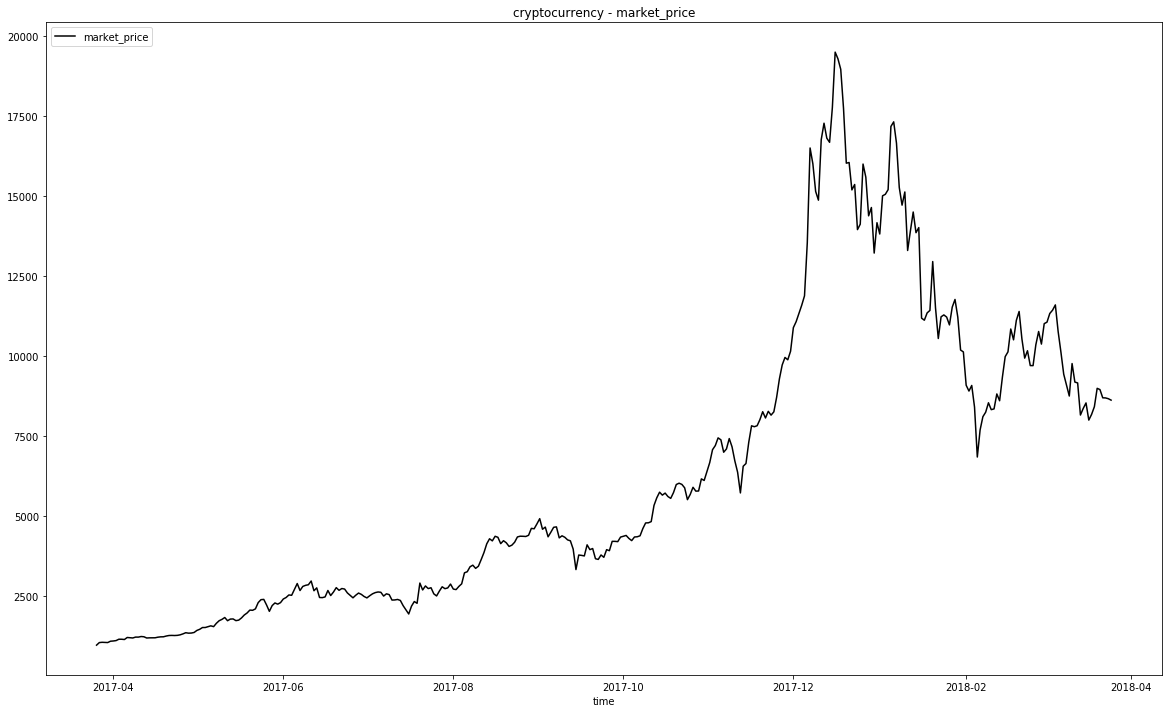

In [35]:
plot_single(S2, 'x_', 'market_price', 'insert_label')

colours <matplotlib.colors.LinearSegmentedColormap object at 0x7fd4428e6d30>
colours enumerated (0.5, 0.0, 1.0, 1.0)
colours enumerated (1.0, 1.2246467991473532e-16, 6.123233995736766e-17, 1.0)


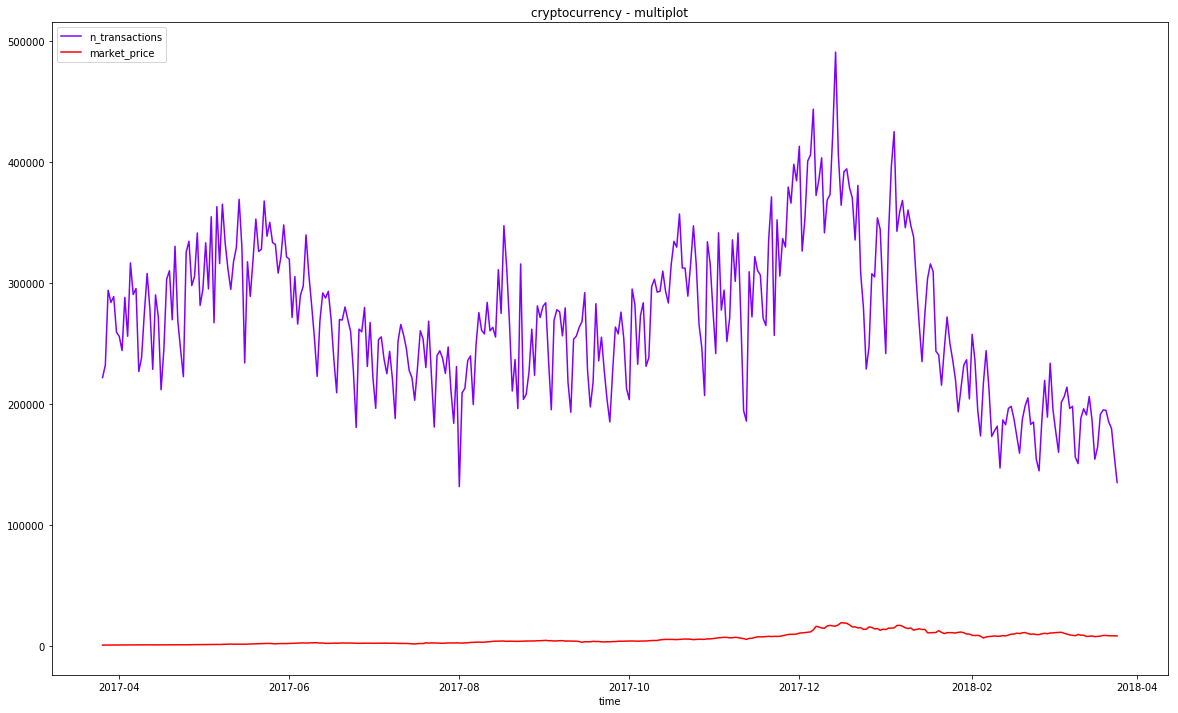

In [39]:
selected_labels = [ x[1] for x in url_tuple ]
plot_multi(S2, selected_labels)

In [7]:
S2.to_csv("S2.csv")